<a href="https://colab.research.google.com/github/philsaurabh/Tutorials/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# To read data as dataframe
df = pd.read_csv('https://raw.githubusercontent.com/philsaurabh/Tutorials/main/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Check Null Values

In [4]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

# Model Building
For Simple Linear Regression,

Equation of linear regression

*y=c+m<sub>1</sub>x<sub>1</sub>+m<sub>2</sub>x<sub>2</sub>+...+m<sub>n</sub>x<sub>n</sub>*

*y*  is the response
*c*  is the intercept
*m<sub>1</sub>*  is the coefficient for the first feature
*m<sub>n</sub>*  is the coefficient for the nth feature
In our case:

*y=c+m<sub>1</sub>×TV*

The  *m*  values are called the model coefficients or model parameters.

In [10]:
X = df['TV']
y = df['sales']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2)# random_state = 100

In [13]:
# The training dataset
print(X_train.head())
print(y_train.head())

147    243.2
11     214.7
141    193.7
44      25.1
166     17.9
Name: TV, dtype: float64
147    25.4
11     17.4
141    19.2
44      8.5
166     8.0
Name: sales, dtype: float64


In [14]:
import statsmodels.api as sm
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [15]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    7.117657
TV       0.048274
dtype: float64

In [16]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     273.4
Date:                Fri, 12 Nov 2021   Prob (F-statistic):           2.75e-36
Time:                        11:08:17   Log-Likelihood:                -408.87
No. Observations:                 160   AIC:                             821.7
Df Residuals:                     158   BIC:                             827.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1177      0.493     14.448      0.0

# Model Evaluation

In [19]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

In [20]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [21]:
y_pred.head()

35     21.150837
62     18.669566
43     17.105496
157    14.349065
104    18.616465
dtype: float64

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

3.732923528444344

In [26]:
# Checking the R-squared on the test set
r_squared = r2_score(y_test, y_pred)
r_squared

0.5200927781124346

# Additional

## Visualization

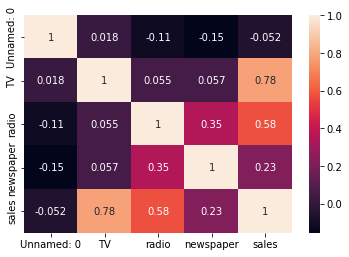

In [7]:
# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns
# Let's see the correlation between different variables.
sns.heatmap(df.corr(),annot= True)# , cmap="YlGnBu", annot = True
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


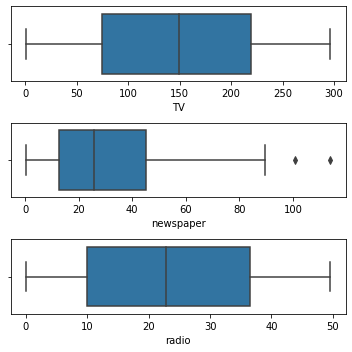

In [9]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['radio'], ax = axs[2])
plt.tight_layout()

In [ ]:
# There are no considerable outliers present in the data.

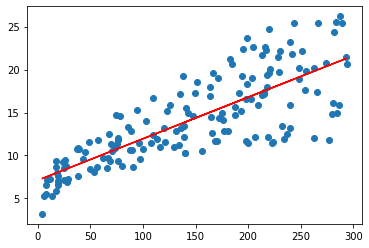

In [18]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 7.1177 + 0.0483*X_train, 'r')
plt.show()

# Using Sklearn

In [42]:
from sklearn.linear_model import LinearRegression
# To read data as dataframe
df = pd.read_csv('https://raw.githubusercontent.com/philsaurabh/Tutorials/main/Advertising.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2)# random_state = 100
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_train, y_train))
reg.score(X_test, y_test)

[[  1.  230.1  37.8  69.2]
 [  2.   44.5  39.3  45.1]
 [  3.   17.2  45.9  69.3]
 [  4.  151.5  41.3  58.5]
 [  5.  180.8  10.8  58.4]
 [  6.    8.7  48.9  75. ]
 [  7.   57.5  32.8  23.5]
 [  8.  120.2  19.6  11.6]
 [  9.    8.6   2.1   1. ]
 [ 10.  199.8   2.6  21.2]
 [ 11.   66.1   5.8  24.2]
 [ 12.  214.7  24.    4. ]
 [ 13.   23.8  35.1  65.9]
 [ 14.   97.5   7.6   7.2]
 [ 15.  204.1  32.9  46. ]
 [ 16.  195.4  47.7  52.9]
 [ 17.   67.8  36.6 114. ]
 [ 18.  281.4  39.6  55.8]
 [ 19.   69.2  20.5  18.3]
 [ 20.  147.3  23.9  19.1]
 [ 21.  218.4  27.7  53.4]
 [ 22.  237.4   5.1  23.5]
 [ 23.   13.2  15.9  49.6]
 [ 24.  228.3  16.9  26.2]
 [ 25.   62.3  12.6  18.3]
 [ 26.  262.9   3.5  19.5]
 [ 27.  142.9  29.3  12.6]
 [ 28.  240.1  16.7  22.9]
 [ 29.  248.8  27.1  22.9]
 [ 30.   70.6  16.   40.8]
 [ 31.  292.9  28.3  43.2]
 [ 32.  112.9  17.4  38.6]
 [ 33.   97.2   1.5  30. ]
 [ 34.  265.6  20.    0.3]
 [ 35.   95.7   1.4   7.4]
 [ 36.  290.7   4.1   8.5]
 [ 37.  266.9  43.8   5. ]
 

1.0

In [39]:
print(reg.intercept_)
print(reg.coef_)

-2.842170943040401e-14
[2.28022226e-17 1.00000000e+00]
